In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("Mall_Customers.csv")

In [4]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
245,246,Male,30,297,69
246,247,Female,56,311,14
247,248,Male,29,313,90
248,249,Female,19,316,32


In [5]:
x=df.iloc[:,[3,4]].values

C:\Users\91807\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


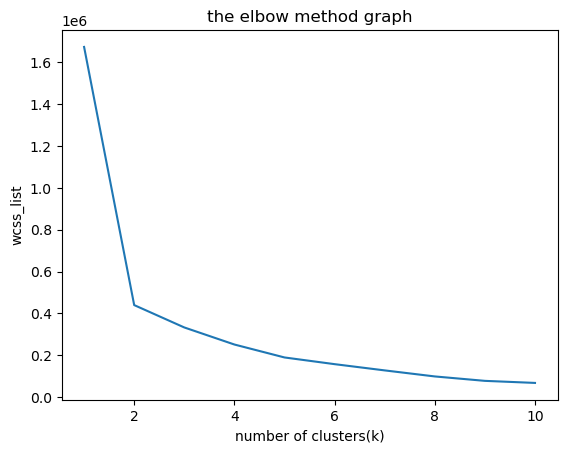

In [6]:
#finding optimal number of clustering using the elbow method
from sklearn.cluster import KMeans
wcsslist=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init = 'k-means++',random_state=42)
    kmeans.fit(x)
    wcsslist.append(kmeans.inertia_)
plt.plot(range(1,11),wcsslist)
plt.title('the elbow method graph')
plt.xlabel('number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

In [7]:
#best to choose 2 but used 5

### training the k means algorithm on the training dataset

In [8]:
kmeans=KMeans(n_clusters=5, init='k-means++',random_state=42)
y_predict=kmeans.fit_predict(x)

# visualising the clusters

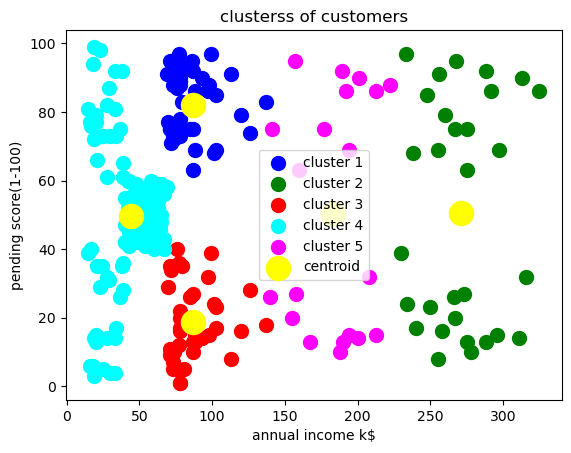

In [9]:
plt.scatter(x[y_predict==0,0], x[y_predict==0,1],s=100,c='blue',label='cluster 1')#for first cluster
plt.scatter(x[y_predict==1,0], x[y_predict==1,1],s=100,c='green',label='cluster 2')#for second cluster
plt.scatter(x[y_predict==2,0], x[y_predict==2,1],s=100,c='red',label='cluster 3')#for third cluster
plt.scatter(x[y_predict==3,0], x[y_predict==3,1],s=100,c='cyan',label='cluster 4')#for fourth cluster
plt.scatter(x[y_predict==4,0], x[y_predict==4,1],s=100,c='magenta',label='cluster 5')#for fifth cluster
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='centroid')
plt.title('clusterss of customers')
plt.xlabel('annual income k$')
plt.ylabel('pending score(1-100)')
plt.legend()
plt.show()

# DBscan_cluttering

a good rule of thumb for min points is 2*dimensions (which is features).It must be absolutely should be at minimum a three.
EPS:
to calculate the value of eps, we shall calculate the distance between each datapoints to its closest neighbour using the nearest neighbors.after that , we sort them and finally plot them.from the plot , we identify the minimum value at the curvature of the graph.this value is our eps.

### compute data proximity from each other using nearest neighbour(or find eps)

In [10]:
from sklearn.neighbors import NearestNeighbors
neighb=NearestNeighbors(n_neighbors=2)#creating an object of the nearestneighbors class
nbrs=neighb.fit(x)#fitting the data to the object
distances,indices=nbrs.kneighbors(x)#finding the nearest neighbors

### sorting and plot the distances between the data points

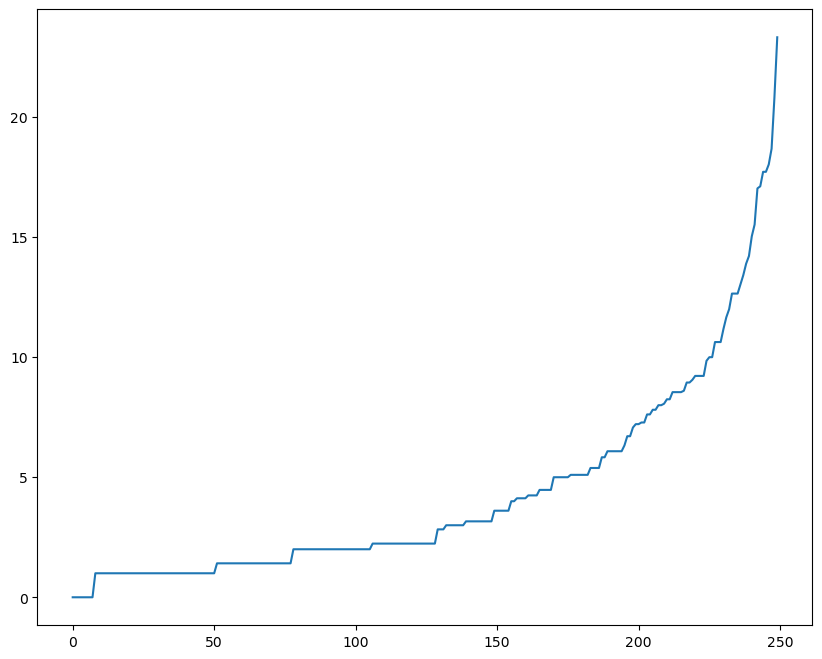

In [11]:
import numpy as np
#sort and plot the distance results
distances = np.sort(distances,axis=0)#sorting the distances
distances= distances[:,1]#taking the second column of the sorted distances
plt.rcParams['figure.figsize']= (10,8)
plt.plot(distances)
plt.show()

max jumb (in my words) along x axis is 8 so we take eps as 8
minpoints we take is 4

In [12]:
from sklearn.cluster import DBSCAN
#cluster the data into five clusters
dbscan=DBSCAN(eps=8,min_samples=4).fit(x)#fitting the model
labels = dbscan.labels_#getting the labels

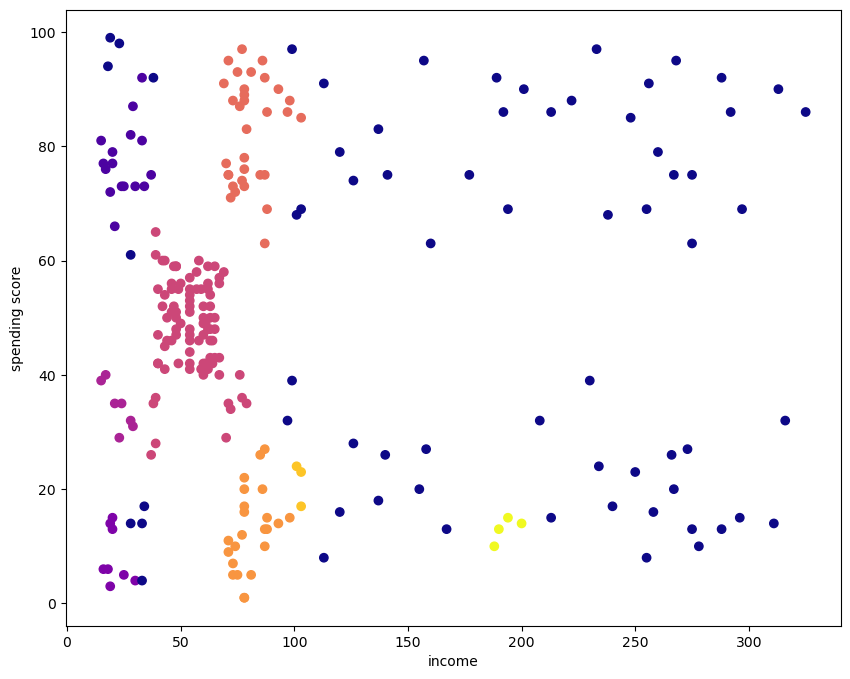

In [13]:
#plot the clusters
plt.scatter(x[:,0],x[:,1],c=labels,cmap='plasma')
plt.xlabel("income")#x-axis label
plt.ylabel("spending score")#y-axis label
plt.show()

In [14]:
distances

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.41421356,  1.41421356,  1.41421356,  1.41421356,
        1.41421356,  1.41421356,  1.41421356,  1.41421356,  1.41421356,
        1.41421356,  1.41421356,  1.41421356,  1.41421356,  1.41421356,
        1.41421356,  1.41421356,  1.41421356,  1.41421356,  1.41